In [12]:
import import_ipynb
%run Utils.ipynb
%run Models.ipynb


In [13]:
start_time = datetime.now()
print("Code running started at:", start_time.strftime("%Y-%m-%d %H:%M:%S"))
print_environment_info()

Code running started at: 2024-10-29 12:08:20
---------------------------------------
Python Version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:38:46) [MSC v.1929 64 bit (AMD64)]
Python Executable: c:\Users\Monet\anaconda3\envs\bone-age\python.exe
Operating System: Windows 10
Platform: Windows-10-10.0.19045-SP0
Architecture: ('64bit', 'WindowsPE')
NumPy Version: 1.26.4
Pandas Version: 2.2.1
TensorFlow Version: 2.7.0
imblearn Version: 0.12.3
Matplotlib Version: 3.8.3
Current Working Directory: c:\Users\Monet\Desktop\EcoCurrentNet
Installed Packages:

Hardware Information:

Software Versions:
scikit-learn Version: 1.5.2
scipy Version: 1.13.0
Pillow Version: 10.3.0
jupyter is not installed.
seaborn Version: 0.13.2
keras Version: 2.7.0
matplotlib Version: 3.8.3
numpy Version: 1.26.4
tensorflow Version: 2.7.0
imblearn is not installed.
statsmodels is not installed.
xgboost Version: 2.1.2
lightgbm Version: 4.5.0
catboost Version: 1.2.7
optuna is not installed.
tensorflow_addon

In [14]:
data_generator = OptoelectronicDataGenerator(n_samples=1000)
X_train, X_val, y_train, y_val, X, y = data_generator.preprocess_data()


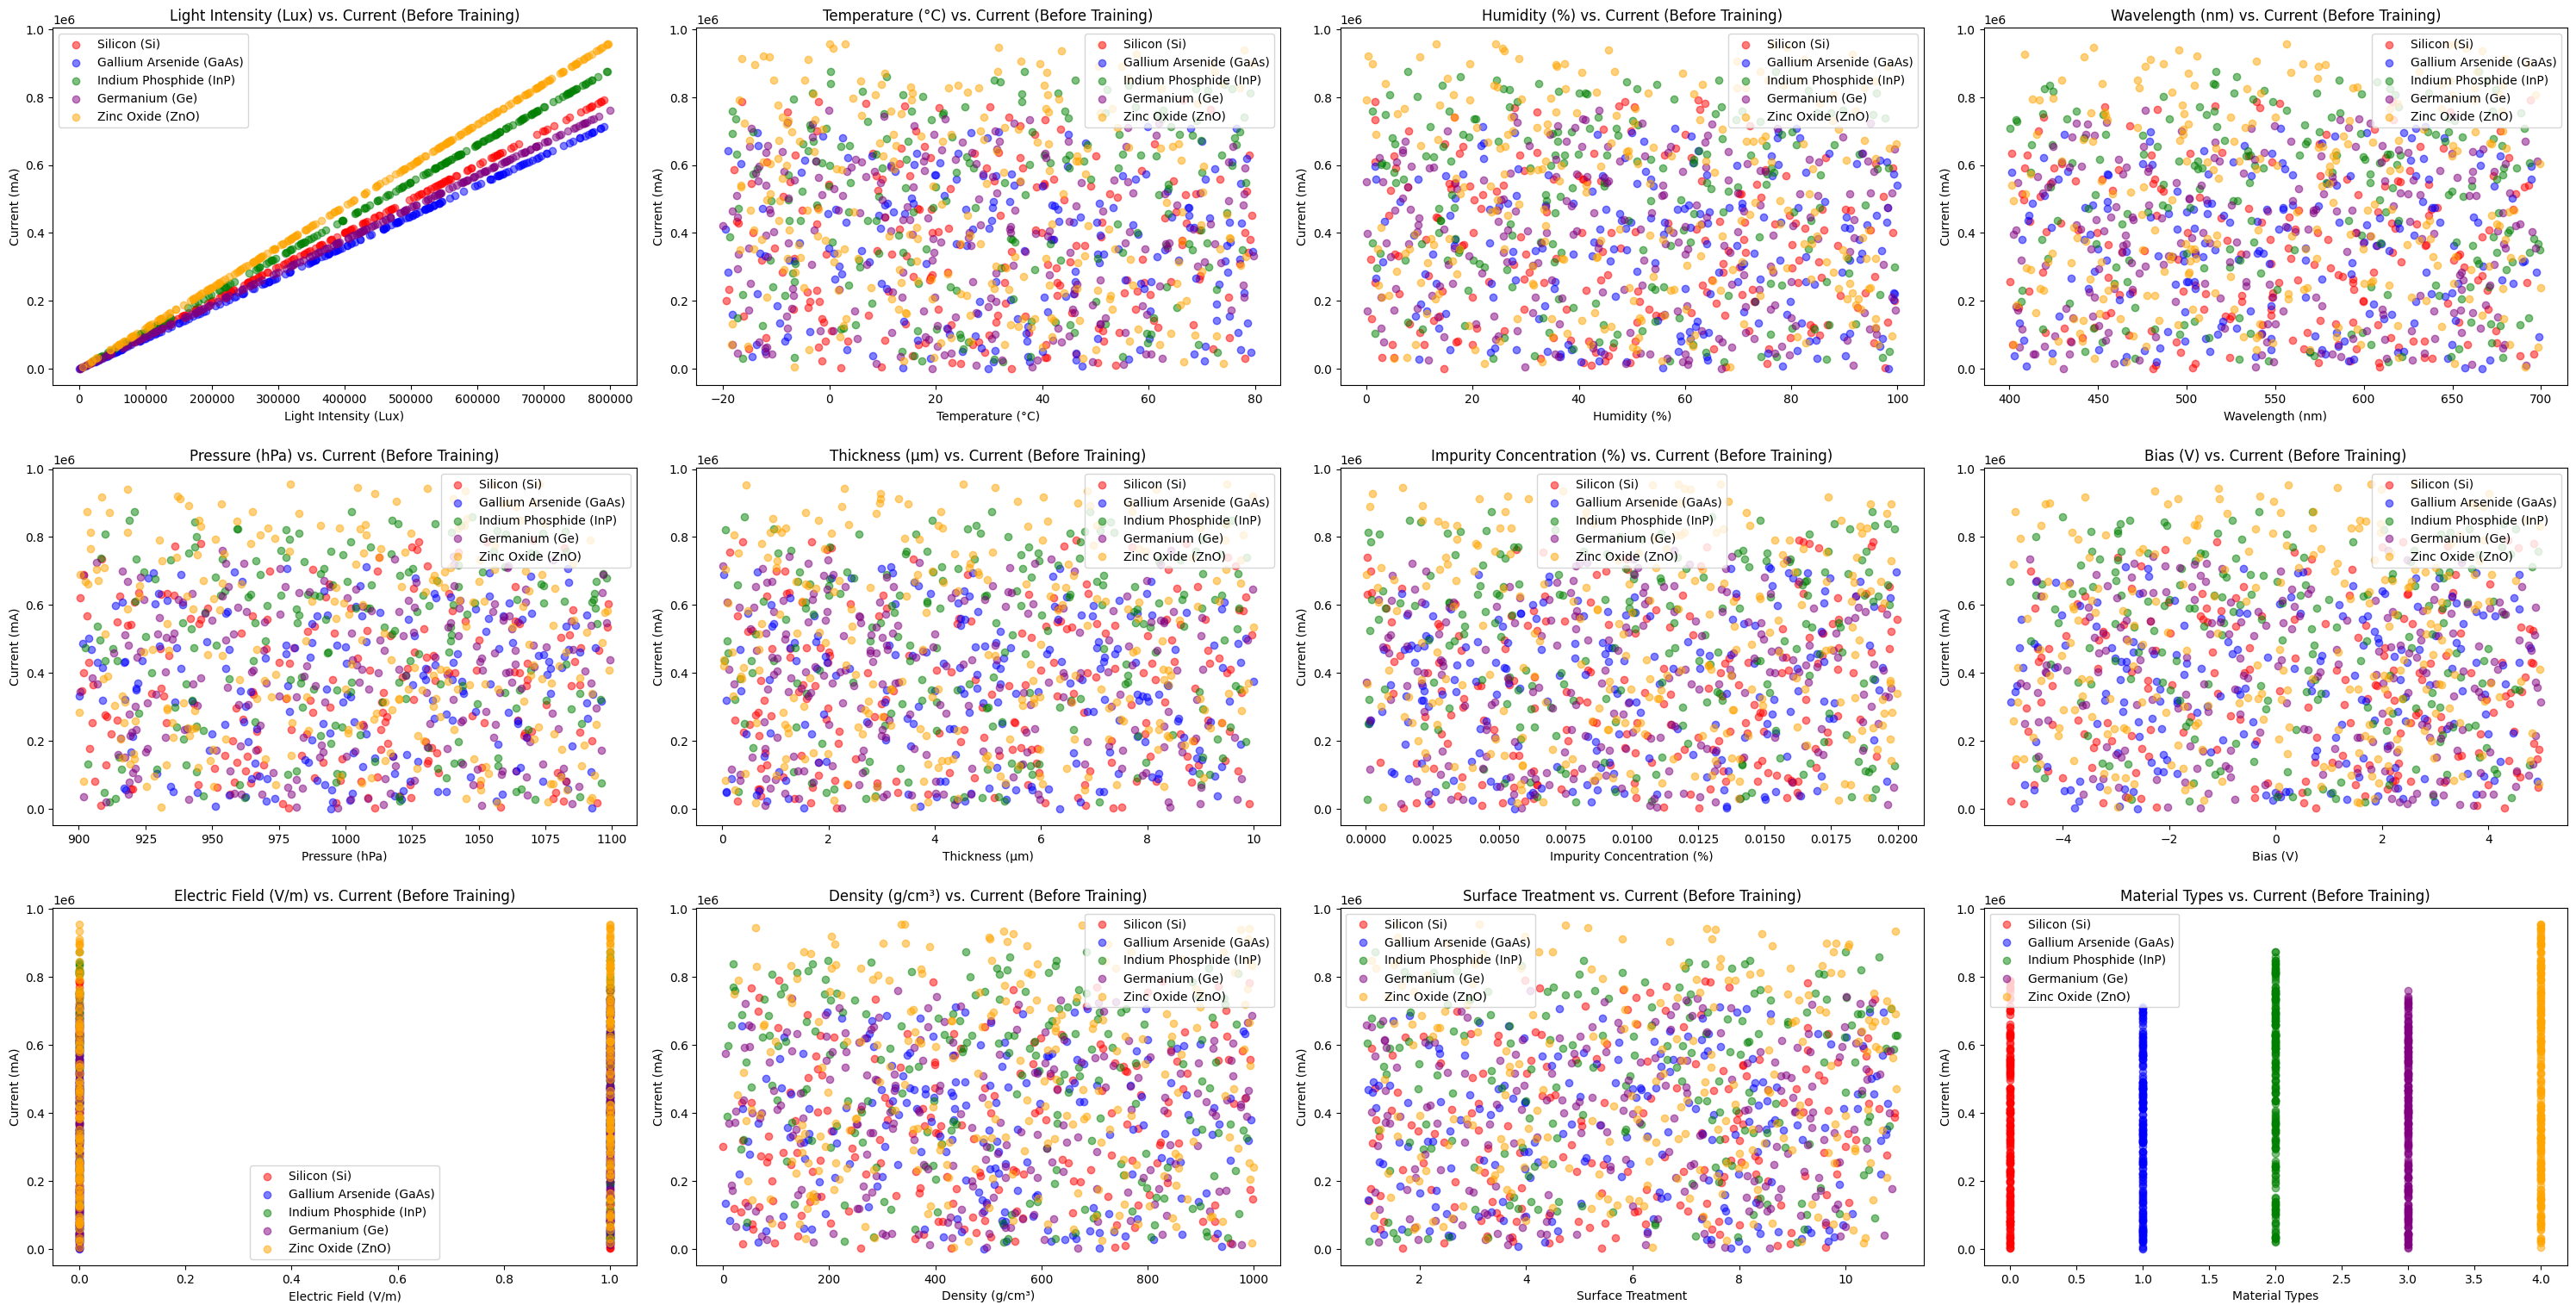

In [15]:
plot_material_properties_before_training(X, y, data_generator.material_properties)

c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.




CatBoost Metrics (CatBoost):
Root Mean Square Error: 21924.483162
Mean Squared Error: 480682961.915880
Mean Absolute Error: 15446.179866
R² Score: 0.992225
----------



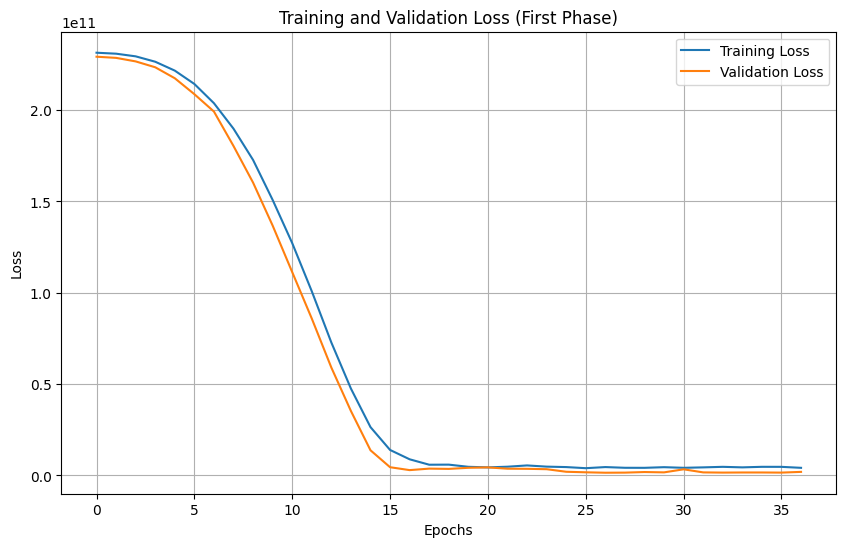

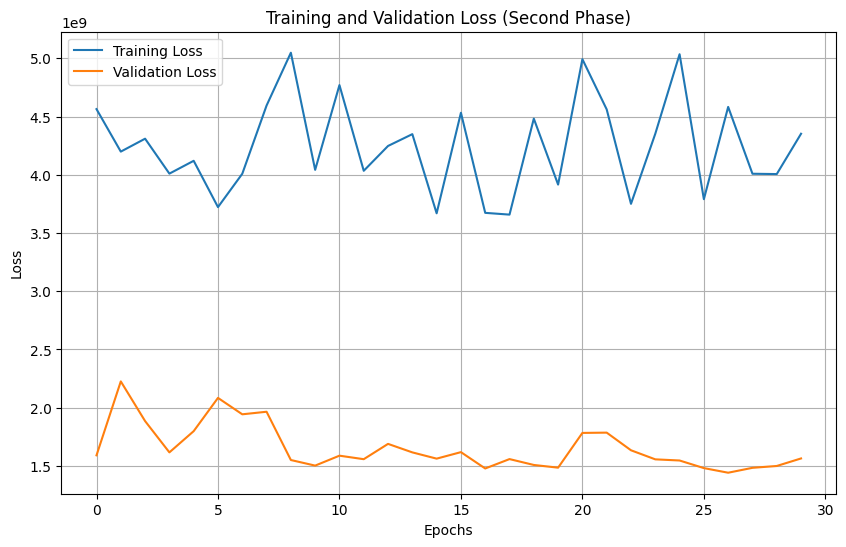

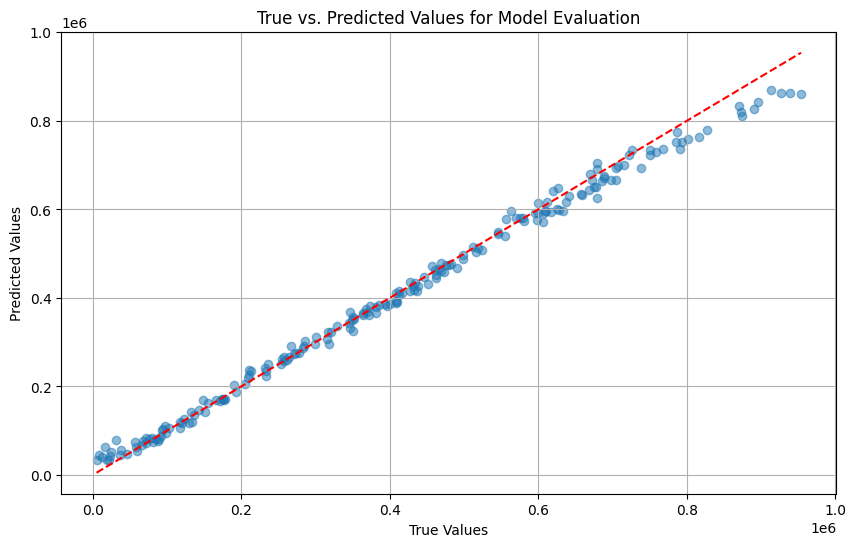

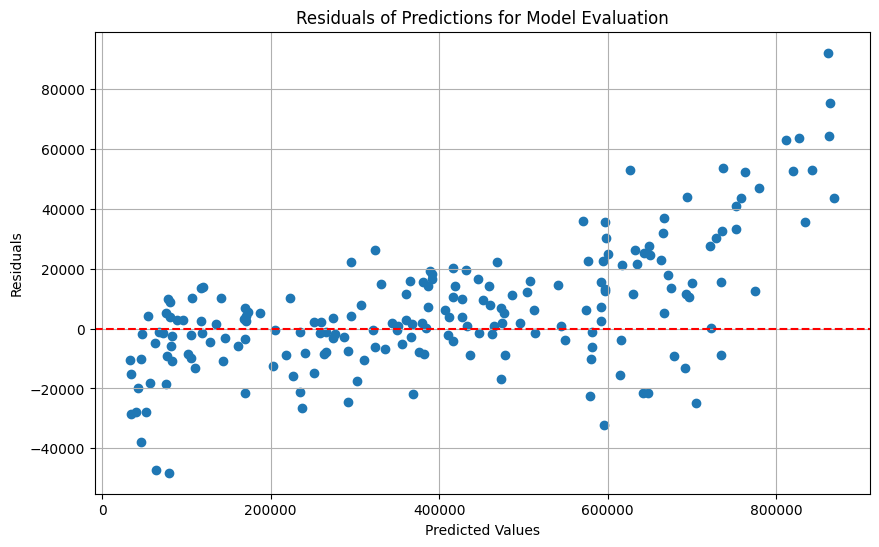

In [16]:
rmse, mse, mae, r2, (best_epoch_first, best_val_loss_first), (best_epoch_second, best_val_loss_second), y_pred_catboost, X_val = train(
    EcoCurrentNet,
    X_train,
    y_train,
    X_val,
    y_val
)

In [17]:
# Print model summary
model, catboost = EcoCurrentNet(X_train.shape[1])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 12, 1)]      0           []                               
                                                                                                  
 conv1d_21 (Conv1D)             (None, 12, 64)       256         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_21 (BatchN  (None, 12, 64)      256         ['conv1d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 leaky_re_lu_15 (LeakyReLU)     (None, 12, 64)       0           ['batch_normalization_21[0]

In [18]:
# import import_ipynb
# %run Utils.ipynb
# %run Models.ipynb


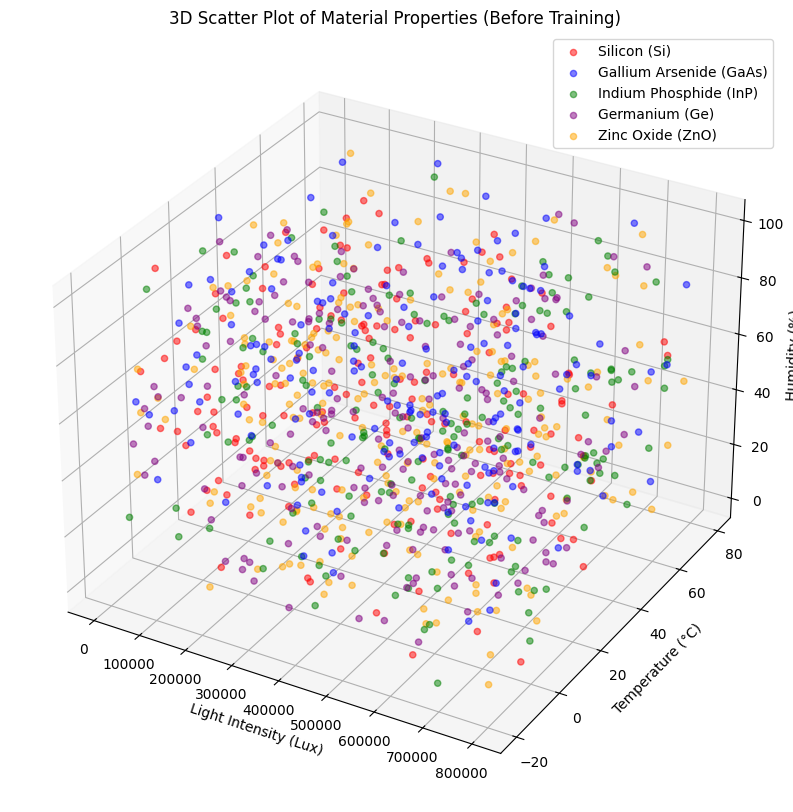

In [19]:
plot_material_properties(X, y, data_generator.material_properties)

In [20]:
plot_current_in_3D(X, y, data_generator.material_properties)

In [21]:
end_time = datetime.now()
print("Code running ended at:", end_time.strftime("%Y-%m-%d %H:%M:%S"))
print("---------------------------------------")

execution_time = end_time - start_time
print("Total execution time:", execution_time)

Code running ended at: 2024-10-29 12:08:40
---------------------------------------
Total execution time: 0:00:20.400358
